In [52]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing  import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
#Loading the data set
credit_card_data=pd.read_csv('C:\\Users\\SreeNidhi\\creditcard.csv')
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#first 5 rows of data set
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


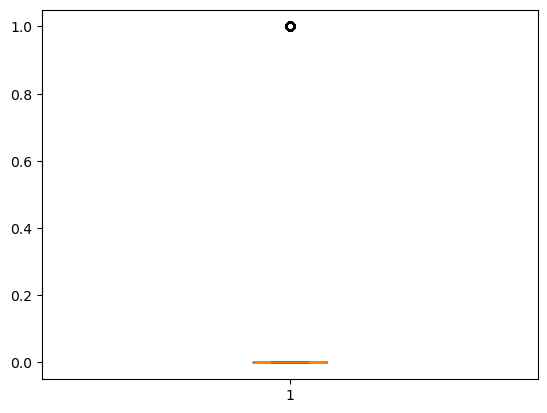

In [7]:
plt.boxplot(credit_card_data["Class"])
plt.show()

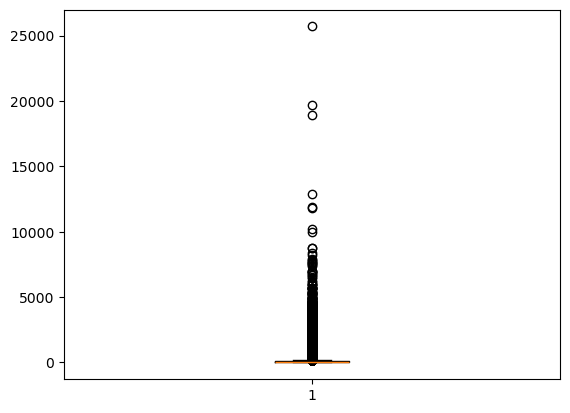

In [8]:
plt.boxplot(credit_card_data["Amount"])
plt.show()

In [9]:
#distribution of legit transactions and fraudulant transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
def replace_data_to_binary(x,y):
   credit_card_data.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary(0, 'Non Fraudulent')
replace_data_to_binary(1, 'Fraudulent')

<Axes: xlabel='Class', ylabel='count'>

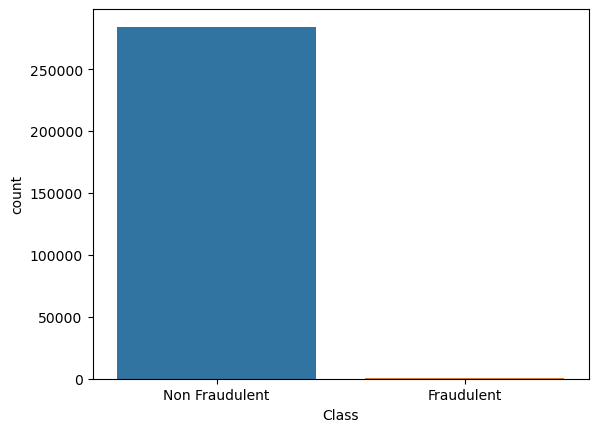

In [11]:
sns.countplot(x="Class",data=credit_card_data)

We understand from the above statistics that the average money
transaction for the fraudulent ones is observed more compared to non-fraudulent ones.

In [12]:
# Data is 48hours but the values seems to represent seconds so will convert it to hours - 1hour =3600seconds 

credit_card_data['Time'] =credit_card_data['Time']/3600

Evaluate the time vs. amount transaction between fraudulent and non-fraudulent


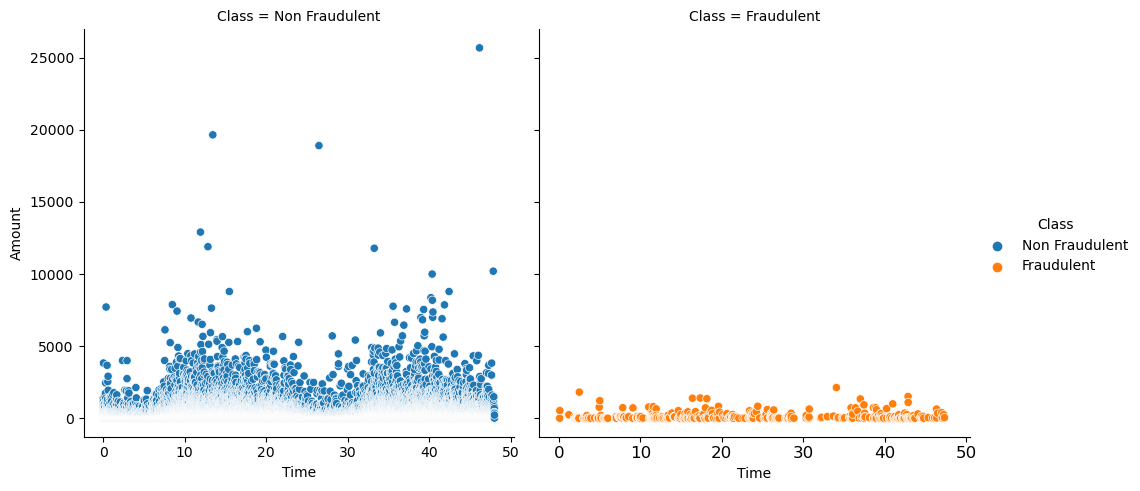

In [13]:
# Evaluating time vs. amount transaction between fraudulent and non-fraudulent

print("Evaluate the time vs. amount transaction between fraudulent and non-fraudulent");
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=credit_card_data)
plt.tick_params(labelsize=12)
plt.show(); 

Few insights on the visualization above reveal the following:
1.The plot indicates that the fraud amounts were less than approx 2.2k.
2. Fraud pattern indicates that the number of data points is observed between 14 to 20 hours on both days.
3. We can see a two-picks pattern in time due tonight.

In [14]:
credit_card_data["Time"]=pd.to_datetime(credit_card_data["Time"])
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00.000000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Non Fraudulent
1,1970-01-01 00:00:00.000000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Non Fraudulent
2,1970-01-01 00:00:00.000000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Non Fraudulent
3,1970-01-01 00:00:00.000000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Non Fraudulent
4,1970-01-01 00:00:00.000000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Non Fraudulent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1970-01-01 00:00:00.000000047,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,Non Fraudulent
284803,1970-01-01 00:00:00.000000047,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,Non Fraudulent
284804,1970-01-01 00:00:00.000000047,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,Non Fraudulent
284805,1970-01-01 00:00:00.000000047,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,Non Fraudulent


In [15]:
# Assigning back to class one and zero for analysis

def replace_data_to_binary(x,y):
    credit_card_data.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary('Non Fraudulent', 0)
replace_data_to_binary ('Fraudulent', 1)

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

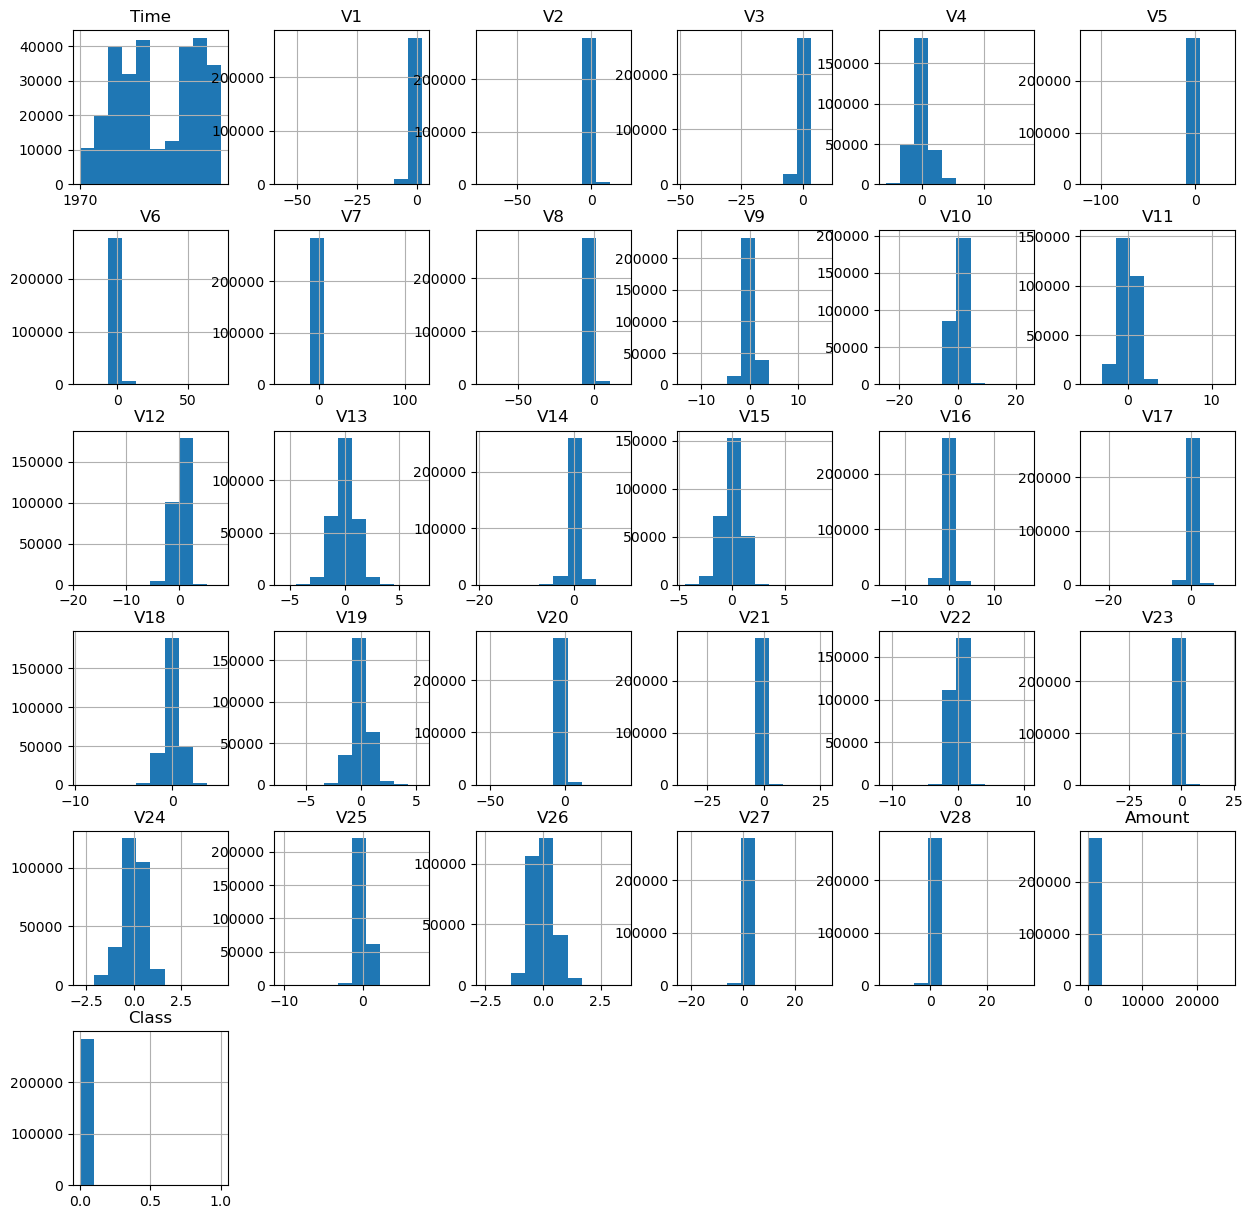

In [117]:
credit_card_data.hist(figsize=(15,15))

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

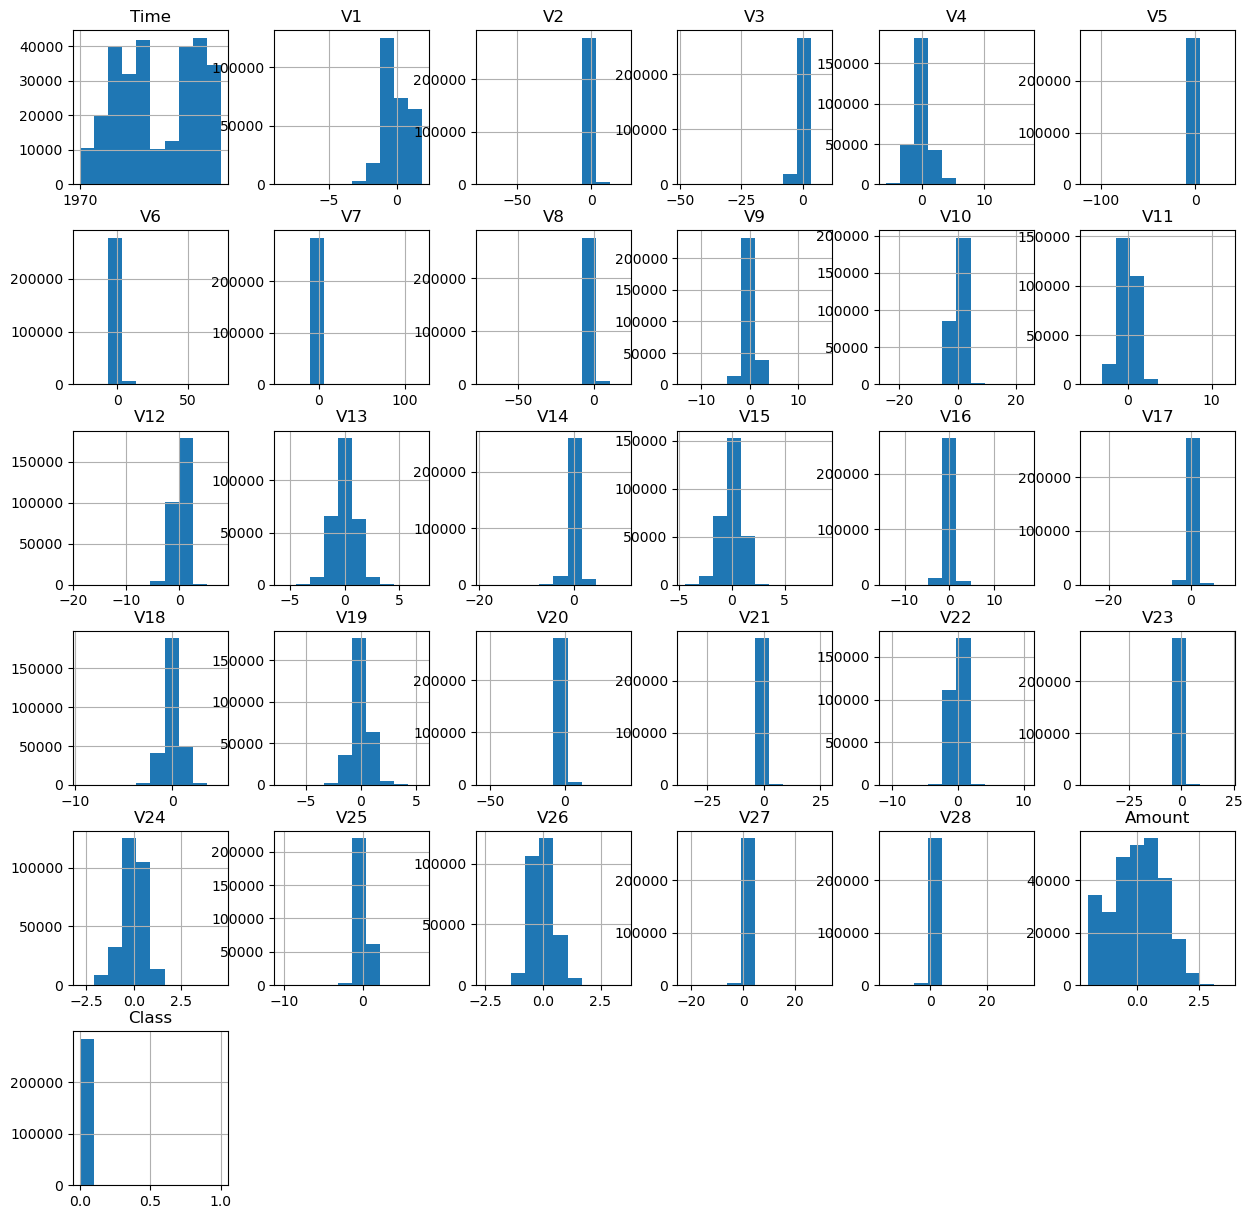

In [16]:
credit_card_data[["V1","Amount"]]=power_transform(credit_card_data[["V1","Amount"]])
credit_card_data.hist(figsize=(15,15))

C:\Users\SreeNidhi\AppData\Local\Temp\ipykernel_6008\1305875062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_data['Amount'] = StandardScaler().fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))
C:\Users\SreeNidhi\AppData\Local\Temp\ipykernel_6008\1305875062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_data['Time'] = StandardScaler().fit_transform(credit_card_data['Time'].values.reshape(-1, 1))


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

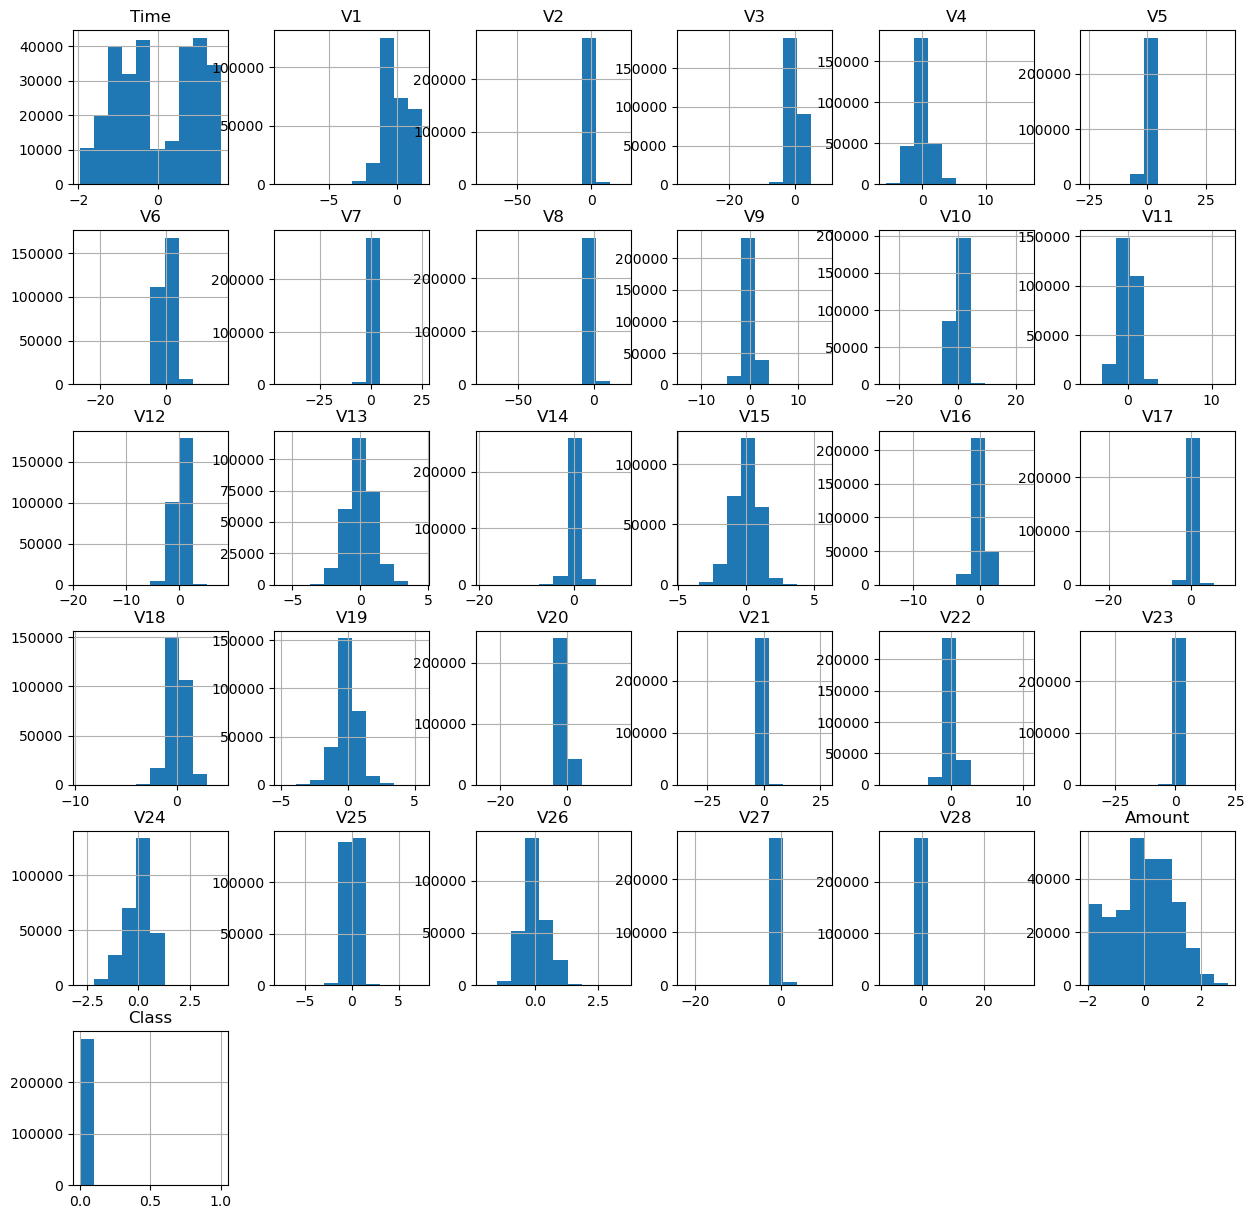

In [65]:
credit_card_data['Amount'] = StandardScaler().fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))
credit_card_data['Time'] = StandardScaler().fit_transform(credit_card_data['Time'].values.reshape(-1, 1))
credit_card_data.hist(figsize=(15,15))

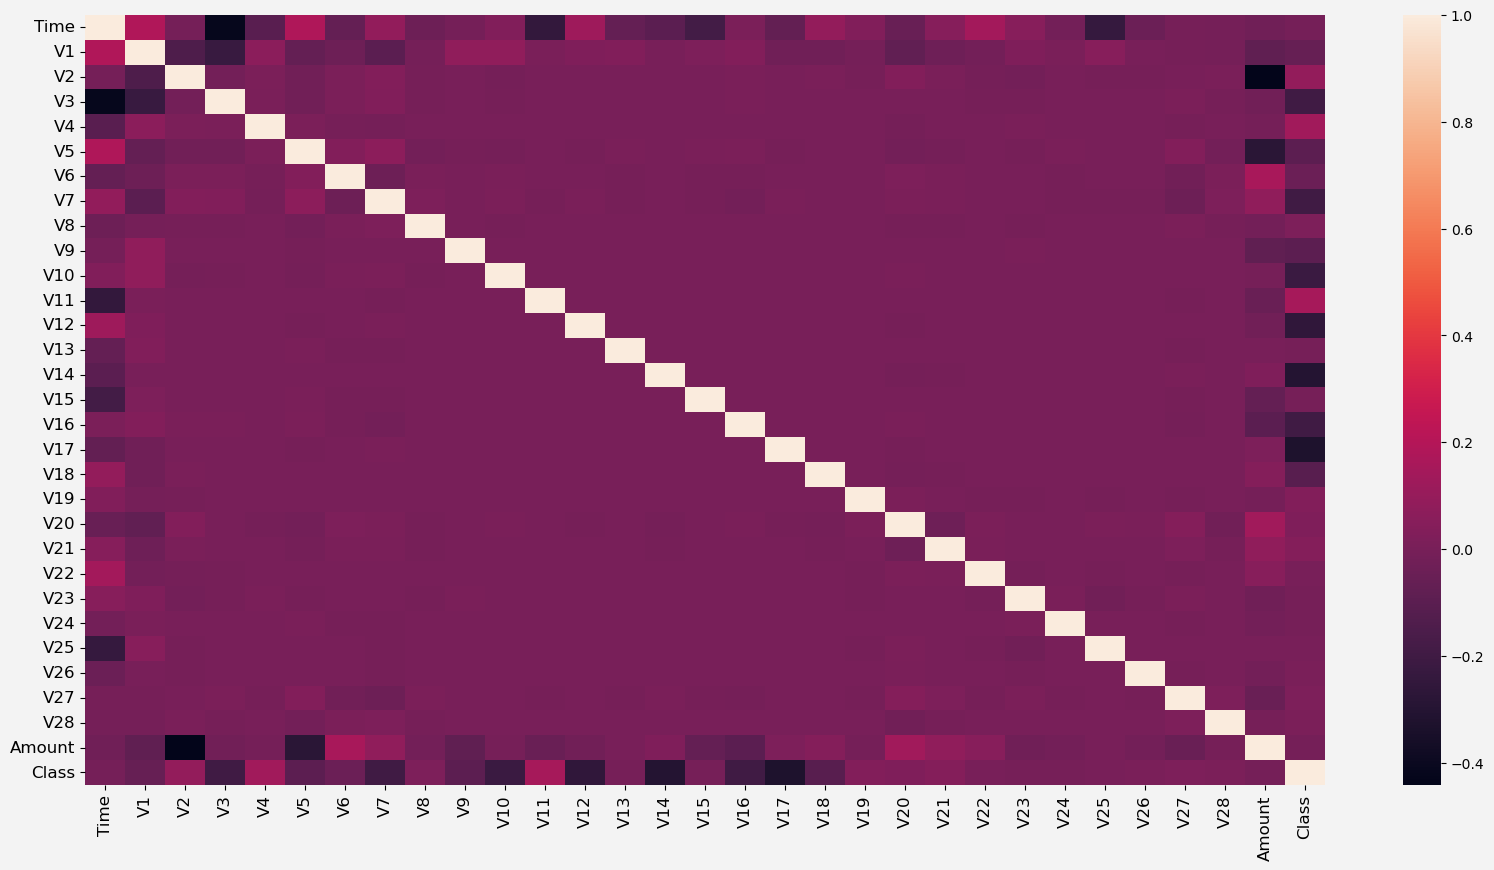

In [66]:
# Evaluating the correlation between different parameters in the dataset if any 

credit_card_data_corr=credit_card_data.corr()
fig = plt.figure(figsize=(20,10))
fig.set_facecolor("#F3F3F3")
ax=sns.heatmap(credit_card_data_corr)
plt.tick_params(labelsize=12)
plt.show();

In [67]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.960270,-0.904815,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.120051,0
1,-1.960270,0.626390,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.128708,0
2,-1.960270,-0.904242,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.624612,0
3,-1.960270,-0.742857,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.013481,0
4,-1.960270,-0.823641,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.693776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.604473,-3.432267,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-1.620312,0
284803,1.604473,-0.639272,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.096749,0
284804,1.604473,1.309171,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.676375,0
284805,1.604473,-0.395844,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.427142,0


In [68]:
def remove_outliers(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    iqr=q3-q1
    ub=q3+iqr*1.5
    lb=q1-iqr*1.5
    result=d[(d[c]>=lb)&(d[c]<=ub)]
    return result

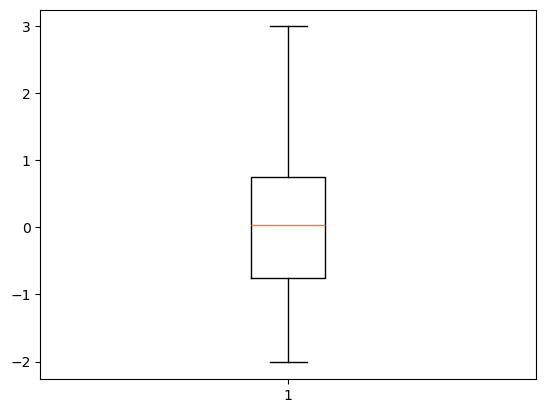

In [69]:
#Check outliers
credit_card_data=remove_outliers(credit_card_data,"Amount")
plt.boxplot(credit_card_data["Amount"]) #no outlier
plt.show()

In [70]:
#seperating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [71]:
print(legit.shape)
print(fraud.shape)

(284279, 31)
(492, 31)


In [72]:
legit.Amount.describe()

count    284279.000000
mean          0.000401
std           0.999258
min          -2.013758
25%          -0.747090
50%           0.027517
75%           0.747933
max           2.989205
Name: Amount, dtype: float64

In [73]:
fraud.Amount.describe()

count    492.000000
mean      -0.231718
std        1.344835
min       -2.013758
25%       -1.537432
50%       -0.471471
75%        0.927486
max        2.510883
Name: Amount, dtype: float64

In [74]:
#compare the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.000513,0.003156,-0.003224,0.013767,-0.008698,0.007920,0.000995,0.006823,-0.000392,0.004584,...,-0.001511,-0.001432,0.000260,0.000504,0.000114,0.000076,-0.000047,-0.000513,-0.000129,0.000401
1,-0.296292,-1.522167,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,-0.231718


In [75]:
#splitting the data into features and targets
X=credit_card_data.drop(columns='Class',axis=1)
Y=credit_card_data['Class']

In [76]:
print(X)

            Time        V1         V2        V3        V4        V5        V6  \
0      -1.960270 -0.904815  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -1.960270  0.626390   0.266151  0.166480  0.448154  0.060018 -0.082361   
2      -1.960270 -0.904242  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3      -1.960270 -0.742857  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4      -1.960270 -0.823641   0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...        ...       ...       ...       ...       ...   
284802  1.604473 -3.432267  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  1.604473 -0.639272  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  1.604473  1.309171  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  1.604473 -0.395844   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  1.604473 -0.545340  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8 

In [77]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284771, dtype: int64



UNDER SAMPLING FUNCTION

In [78]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
X_us,Y_us=us.fit_resample(X,Y)
print("The number of classes before fit {}".format(Counter(Y)))
print("The number of classes after fit {}".format(Counter(Y_us)))

The number of classes before fit Counter({0: 284279, 1: 492})
The number of classes after fit Counter({0: 492, 1: 492})




OVER SAMPLING FUNCTION

In [79]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_os,Y_os=os.fit_resample(X,Y)
print("The number of classes before fit {}".format(Counter(Y)))
print("The number of classes after fit {}".format(Counter(Y_os)))

The number of classes before fit Counter({0: 284279, 1: 492})
The number of classes after fit Counter({0: 284279, 1: 284279})


In [81]:
#split the data into training data and testing data for  X and Y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [82]:
#split the data into training data and testing data for under sampling function
X_train_us,X_test_us,Y_train_us,Y_test_us=train_test_split(X_us,Y_us,test_size=0.3)

In [83]:
#split the data into training data and testing data for over sampling function
X_train_os,X_test_os,Y_train_os,Y_test_os=train_test_split(X_os,Y_os,test_size=0.3)

In [84]:
print(X.shape,X_train.shape,X_test.shape)

(284771, 30) (199339, 30) (85432, 30)


In [85]:
print(X_us.shape,X_train_us.shape,X_test_us.shape)

(984, 30) (688, 30) (296, 30)


In [86]:
print(X_os.shape,X_train_os.shape,X_test_os.shape)

(568558, 30) (397990, 30) (170568, 30)




We will use 3 different models to evaluate the above data set using undersampling and oversampling method.
The models, here we used are 

1.Logistic Regression
2.Random Forest cLassifier
3.Decision Tree Classifier


LOGISTIC REGRESSION


In [87]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [88]:
Y_pred=lr.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85282    14]
 [   57    79]]
0.9991689296750632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.58      0.69       136

    accuracy                           1.00     85432
   macro avg       0.92      0.79      0.84     85432
weighted avg       1.00      1.00      1.00     85432





Undersampling on Logistic Regression

In [89]:
lr.fit(X_train_us,Y_train_us)

LogisticRegression()

In [90]:
us_Y_pred1=lr.predict(X_test_us)
print(confusion_matrix(Y_test_us,us_Y_pred1))
print(accuracy_score(Y_test_us,us_Y_pred1))
print(classification_report(Y_test_us,us_Y_pred1))

[[139   8]
 [ 10 139]]
0.9391891891891891
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       147
           1       0.95      0.93      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



OVER SAMPLING ON LR

In [91]:
lr.fit(X_train_os,Y_train_os)

LogisticRegression()

In [92]:
os_Y_pred1=lr.predict(X_test_os)
print(confusion_matrix(Y_test_os,os_Y_pred1))
print(accuracy_score(Y_test_os,os_Y_pred1))
print(classification_report(Y_test_os,os_Y_pred1))

[[83066  1968]
 [ 6872 78662]]
0.9481731626096337
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85034
           1       0.98      0.92      0.95     85534

    accuracy                           0.95    170568
   macro avg       0.95      0.95      0.95    170568
weighted avg       0.95      0.95      0.95    170568



RANDOM FOREST

In [93]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [94]:
Y_pred=rf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85287     9]
 [   30   106]]
0.999543496582077
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.78      0.84       136

    accuracy                           1.00     85432
   macro avg       0.96      0.89      0.92     85432
weighted avg       1.00      1.00      1.00     85432




UNDER SAMPLING ON RANDOM FOREST

In [95]:
rf.fit(X_train_us,Y_train_us)

RandomForestClassifier()

In [96]:
us_Y_pred2=rf.predict(X_test_us)
print(confusion_matrix(Y_test_us,us_Y_pred2))
print(accuracy_score(Y_test_us,us_Y_pred2))
print(classification_report(Y_test_us,us_Y_pred2))

[[142   5]
 [ 10 139]]
0.9493243243243243
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.97      0.93      0.95       149

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



OVER SAMPLING ON RANDOM FOREST

In [97]:
rf.fit(X_train_os,Y_train_os)

RandomForestClassifier()

In [98]:
os_Y_pred2=rf.predict(X_test_os)
print(confusion_matrix(Y_test_os,os_Y_pred2))
print(accuracy_score(Y_test_os,os_Y_pred2))
print(classification_report(Y_test_os,os_Y_pred2))

[[85026     8]
 [    0 85534]]
0.9999530978847146
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85034
           1       1.00      1.00      1.00     85534

    accuracy                           1.00    170568
   macro avg       1.00      1.00      1.00    170568
weighted avg       1.00      1.00      1.00    170568





DECISION TREE

In [99]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [58]:
Y_pred=dt.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85276    30]
 [   36   101]]
0.9992275552122467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.77      0.74      0.75       137

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



UNDER SAMPLING ON DECISION TREE

In [106]:
dt.fit(X_train_us,Y_train_us)

DecisionTreeClassifier()

In [107]:
us_Y_pred3=dt.predict(X_test_us)
print(confusion_matrix(Y_test_us,us_Y_pred3))
print(accuracy_score(Y_test_us,us_Y_pred3))
print(classification_report(Y_test_us,us_Y_pred3))

[[125  22]
 [ 14 135]]
0.8783783783783784
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       147
           1       0.86      0.91      0.88       149

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



OVER SAMPLING ON DECISION TREE

In [108]:
dt.fit(X_train_os,Y_train_os)

DecisionTreeClassifier()

In [109]:
os_Y_pred3=dt.predict(X_test_os)
print(confusion_matrix(Y_test_os,os_Y_pred3))
print(accuracy_score(Y_test_os,os_Y_pred3))
print(classification_report(Y_test_os,os_Y_pred3))

[[85000    34]
 [    0 85534]]
0.999800666010037
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85034
           1       1.00      1.00      1.00     85534

    accuracy                           1.00    170568
   macro avg       1.00      1.00      1.00    170568
weighted avg       1.00      1.00      1.00    170568



FINAL DATA 

In [110]:
final_data=pd.DataFrame({"Model":["LR","RF","DT"],
                        "RUS":[accuracy_score(Y_test_us,us_Y_pred1)*100,accuracy_score(Y_test_us,us_Y_pred2)*100,accuracy_score(Y_test_us,us_Y_pred3)*100],
                        "ROS" :[accuracy_score(Y_test_os,os_Y_pred1)*100,accuracy_score(Y_test_os,os_Y_pred2)*100,accuracy_score(Y_test_os,os_Y_pred3)*100]
})
final_data

,Model,RUS,ROS
0,LR,93.918919,94.817316
1,RF,94.932432,99.995310
2,DT,87.837838,99.980067


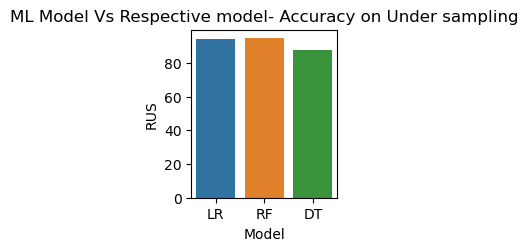

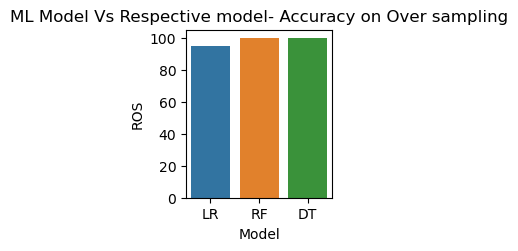

In [111]:
plt.subplot(232)
g=sns.barplot(data=final_data, x="Model", y="RUS")
plt.title('ML Model Vs Respective model- Accuracy on Under sampling')
plt.show()

plt.subplot(232)
g=sns.barplot(data=final_data, x="Model", y="ROS")
plt.title('ML Model Vs Respective model- Accuracy on Over sampling')
plt.show()

HYPER PARAMETER TUNING ON LOGISTIC REGRESSION

In [112]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [113]:
clf=GridSearchCV(lr,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [114]:
#Under Sampling
clf.fit(X_train_us,Y_train_us)

C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\line

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [115]:
us_Y_pred1=clf.predict(X_test_us)
print(confusion_matrix(Y_test_us,us_Y_pred1))
print(accuracy_score(Y_test_us,us_Y_pred1))
print(classification_report(Y_test_us,us_Y_pred1))

[[143   4]
 [ 11 138]]
0.9493243243243243
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.97      0.93      0.95       149

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [83]:
#Over Sampling
clf.fit(X_train_os,Y_train_os)

C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SreeNidhi\anaconda\Lib\site-packages\sklearn\line

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [116]:
os_Y_pred1=clf.predict(X_test_os)
print(confusion_matrix(Y_test_os,os_Y_pred1))
print(accuracy_score(Y_test_os,os_Y_pred1))
print(classification_report(Y_test_os,os_Y_pred1))

[[83312  1722]
 [ 7262 78272]]
0.9473289245344965
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85034
           1       0.98      0.92      0.95     85534

    accuracy                           0.95    170568
   macro avg       0.95      0.95      0.95    170568
weighted avg       0.95      0.95      0.95    170568



In [117]:
final_data_new=pd.DataFrame({"Model":["LR","RF","DT"],
                        "RUS":[accuracy_score(Y_test_us,us_Y_pred1)*100,accuracy_score(Y_test_us,us_Y_pred2)*100,accuracy_score(Y_test_us,us_Y_pred3)*100],
                        "ROS" :[accuracy_score(Y_test_os,os_Y_pred1)*100,accuracy_score(Y_test_os,os_Y_pred2)*100,accuracy_score(Y_test_os,os_Y_pred3)*100]
                          })
final_data_new

,Model,RUS,ROS
0,LR,94.932432,94.732892
1,RF,94.932432,99.995310
2,DT,87.837838,99.980067


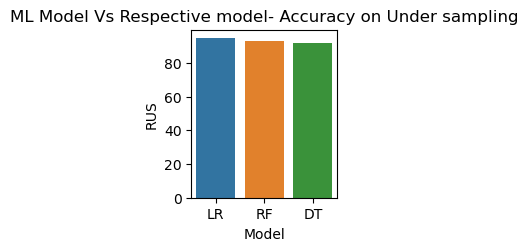

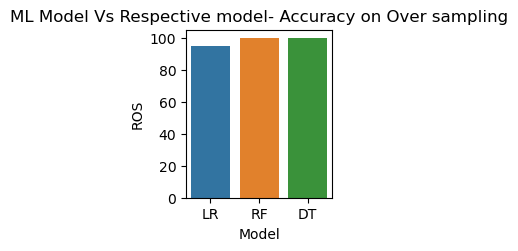

In [86]:
plt.subplot(232)
g=sns.barplot(data=final_data, x="Model", y="RUS")
plt.title('ML Model Vs Respective model- Accuracy on Under sampling')
plt.show()

plt.subplot(232)
g=sns.barplot(data=final_data, x="Model", y="ROS")
plt.title('ML Model Vs Respective model- Accuracy on Over sampling')
plt.show()

Best Model is Random Forest with Oversampling

In [87]:
#Best Model Performance
print(confusion_matrix(Y_test_os,os_Y_pred2))
print(accuracy_score(Y_test_os,os_Y_pred2))
print(classification_report(Y_test_os,os_Y_pred2))

[[85283     8]
 [    0 85298]]
0.9999531036585009
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       1.00      1.00      1.00     85298

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



CONCLUSION



1.We have created  Models and have evaluated all of these models based on different evaluation metrics for these models. 


2.Other metrics considered were Accuracy, Sensitivity/Recall, and Specificity/Precision. The selected model should strike
the right balance between precision and recall. Identifying the fraud precisely is as important as reducing the misidentification of these transactions because both situations result in a loss for the client. . 

Model recommendations: 1) As per the model evaluation,we can consider the Random forest model  which is more accurate among all the other models. 
The Random forest classifier with oversampling method is more accurate with an accuracy value of 99.99%.

3.Least accurate one is Logistic regression model which has less accuracy than the other models.
